# This is an exploratory data analysis of Zomato ratings of Restaurants

In [1]:
# Installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
zomato = pd.read_csv('zomato.csv')
zomato.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
#Replacing white spaces in column names with '_'
zomato.columns = zomato.columns.str.replace(' ','_')

## Data Cleaning

-  #### Over 80% of the data is for restaurants Indian cities of Delhi, Gurugram & Noida. We will explore Indian restaurants here.
-  #### We will remove unrated restaurants.


In [4]:
pd.crosstab(zomato.Country_Code, columns= 'Count')

col_0,Count
Country_Code,
1,8652
14,24
30,60
37,4
94,21
148,40
162,22
166,20
184,20


In [5]:
zomato_india = zomato[zomato.Country_Code == 1]
zomato_india.head(3)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [6]:
zomato_india_rated = zomato_india[zomato_india.Rating_text != 'Not rated']
zomato_india_rated.head(3)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


#### Cuisines column have multiple text separated by ','. This needs to be converted into a single column for analysis.


In [7]:
cuisine = zomato_india_rated.Cuisines

In [8]:
cuisine = cuisine.str.split(', ',expand = True)
cuisine.rename(
    columns = {
        0: 'Cuisine_1',
        1: 'Cuisine_2',
        2: 'Cuisine_3',
        3: 'Cuisine_4',
        4: 'Cuisine_5',
        5: 'Cuisine_6',
        6: 'Cuisine_7',
        7: 'Cuisine_8'
    },inplace= True)
cuisine.head()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
624,North Indian,Mughlai,None,None,None,None,None,None
625,North Indian,Mughlai,None,None,None,None,None,None
626,North Indian,None,None,None,None,None,None,None
627,Rajasthani,None,None,None,None,None,None,None
628,North Indian,Chinese,Mughlai,None,None,None,None,None


In [9]:
zomato_india_rated.drop('Cuisines',axis = 1,inplace = True)

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
zomato_india_rated = pd.concat([zomato_india_rated,cuisine],axis = 1)
zomato_india_rated.head(3)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Average_Cost_for_two,...,Rating_text,Votes,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,850,...,Good,140,North Indian,Mughlai,None,None,None,None,None,None
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,700,...,Good,71,North Indian,Mughlai,None,None,None,None,None,None
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,500,...,Good,94,North Indian,None,None,None,None,None,None,None


In [11]:
# Wide to long format Dataframe.
zomato_india_rated = pd.melt(zomato_india_rated, id_vars = list(zomato_india_rated.columns)[:20], 
                             value_vars = list(zomato_india_rated.columns)[20:], var_name = 'Cuisine',
                             value_name = 'Cuisine_Name')

In [12]:
# Drop rows with NA.
zomato_india_rated.dropna(axis=0,inplace=True)
zomato_india_rated.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Average_Cost_for_two,...,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Cuisine,Cuisine_Name
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,850,...,No,No,No,3,3.9,Yellow,Good,140,Cuisine_1,North Indian
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,700,...,No,No,No,2,3.5,Yellow,Good,71,Cuisine_1,North Indian
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,500,...,No,No,No,2,3.6,Yellow,Good,94,Cuisine_1,North Indian
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,400,...,No,No,No,2,4.0,Green,Very Good,87,Cuisine_1,Rajasthani
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,1000,...,No,No,No,3,4.2,Green,Very Good,177,Cuisine_1,North Indian


## Visualizations

While Zomato has a lot of users rating the restaurants, it seems like the majority of people have rated restaurants to be average or good and only a few have rated above average.

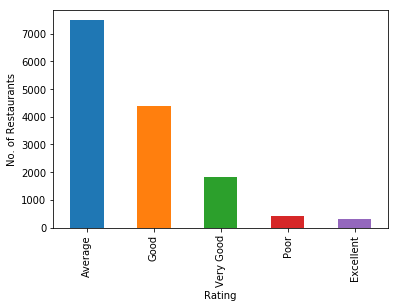

In [13]:
zomato_india_rated.Rating_text.value_counts().plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()

Considering the top 5 cities as per the restaurants serviced by Zomato, it can be seen from the below graph that the maximum popularity of Zomato is in New Delhi region followed by Gurgaon and Noida.

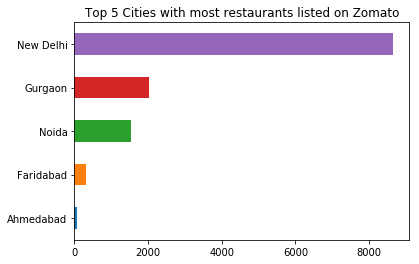

In [14]:
zomato_india_rated.City.value_counts().head().sort_values().plot(kind = 'barh')
plt.title('Top 5 Cities with most restaurants listed on Zomato')
plt.show()

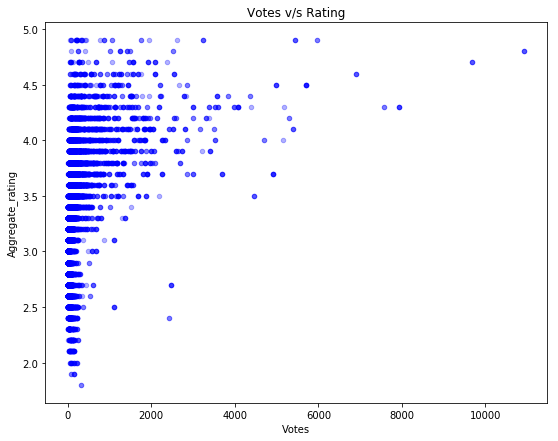

In [15]:
zomato_india_rated.plot(kind = 'scatter',
                       x = 'Votes', y = 'Aggregate_rating',
                       color = 'blue', alpha = 0.3,
                       figsize = (9,7))
plt.title('Votes v/s Rating')
plt.show()

There exists a slight non-linear relationship between Average_Rating and No. of Votes. The ones having higher  

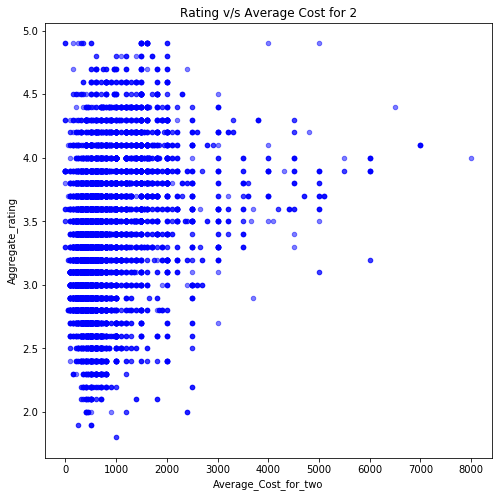

In [16]:
zomato_india_rated.plot(kind = 'scatter',
                 x = 'Average_Cost_for_two',
                 y = 'Aggregate_rating',
                 color = 'blue',
                 alpha = 0.5,
                 figsize= (8,8))
plt.title("Rating v/s Average Cost for 2")
plt.show()

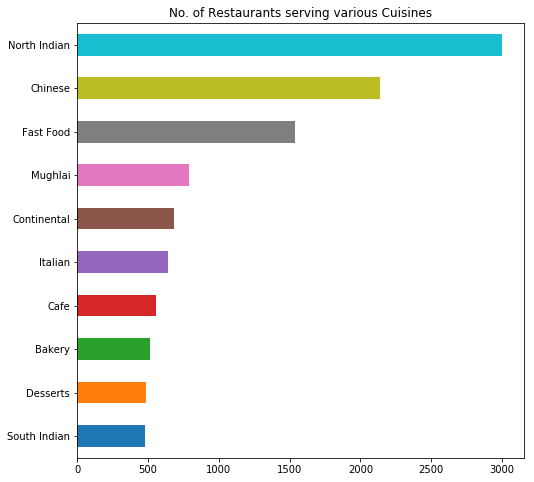

In [17]:
zomato_india_rated.Cuisine_Name.value_counts().head(10).sort_values().plot(kind = 'barh',
                                                                          figsize = (8,8))
plt.title('No. of Restaurants serving various Cuisines')
plt.show()

In [18]:
#Selecting top cuisines for exploration
cuisine_list = ['North Indian', 'South Indian','Chinese','Cafe','Fast Food',
                'Italian','Mughlai','Continental','Bakery','Desserts']

In [19]:
index = []
counter = 0
for i in zomato_india_rated.Cuisine_Name:
    if i in cuisine_list:
        index.append(counter)
    counter+=1
z1 = zomato_india_rated.iloc[index,:]

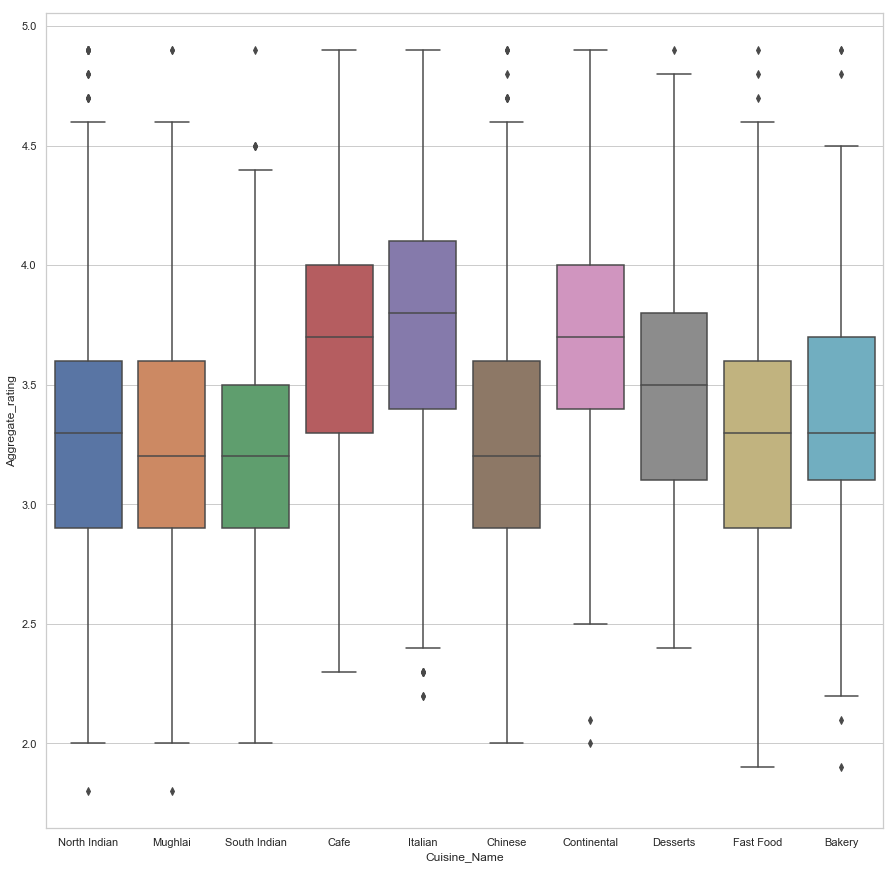

In [38]:
sns.set(style="whitegrid")
sns.boxplot(x = 'Cuisine_Name', y = 'Aggregate_rating',
            data = z1)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

All the cuisines have median rating pretty much between 3 and 3.5 except for Italian, Continental and Cafes having median between 3.5 and 4.

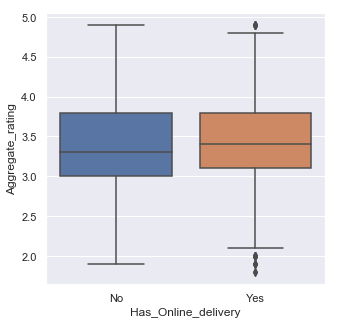

In [36]:
sns.boxplot(x = 'Has_Online_delivery', y = 'Aggregate_rating',
           data = zomato_india_rated)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

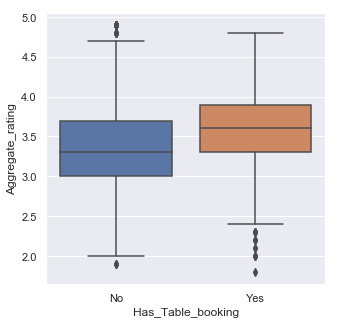

In [15]:
sns.boxplot(x = 'Has_Table_booking', y = 'Aggregate_rating',
           data = zomato_india_rated)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

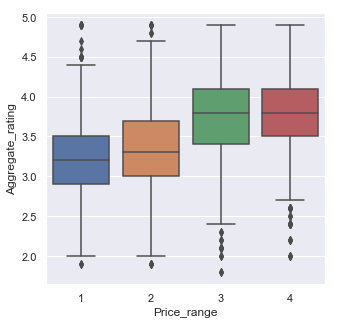

In [14]:
sns.boxplot(x = 'Price_range', y = 'Aggregate_rating',
           data = zomato_india_rated)
plt.show()

Restaurans in price range of 3 & 4 tend to have higher rating than others.